In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

In [2]:
df_GS = pd.read_csv('GS.csv', parse_dates = True)
df_JPM = pd.read_csv('JPM.csv', parse_dates = True)
df_MS = pd.read_csv('MS.csv', parse_dates = True)
df_NYSE = pd.read_csv('^NYA.csv', parse_dates = True)
df_NASDAQ = pd.read_csv('^IXIC.csv', parse_dates = True)

In [3]:
df_GS['Date'] = pd.to_datetime(df_GS.Date)
df_JPM['Date'] = pd.to_datetime(df_JPM.Date)
df_MS['Date'] = pd.to_datetime(df_MS.Date)
df_NYSE['Date'] = pd.to_datetime(df_NYSE.Date)
df_NASDAQ['Date'] = pd.to_datetime(df_NASDAQ.Date)

In [4]:
print('There are {} number of days in the dataset.'.format(df_GS.shape[0]))

There are 3272 number of days in the dataset.


In [5]:
df_GS.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-03-13,141.550003,142.949997,139.179993,140.720001,120.361687,4945700
1,2006-03-14,145.919998,149.500000,145.619995,149.419998,127.803047,11360100
2,2006-03-15,148.300003,149.639999,147.589996,149.000000,127.443787,7557100
3,2006-03-16,149.100006,149.690002,147.449997,147.690002,126.323357,6025800
4,2006-03-17,148.250000,151.539993,148.029999,150.360001,128.607117,6670000


/usr/local/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


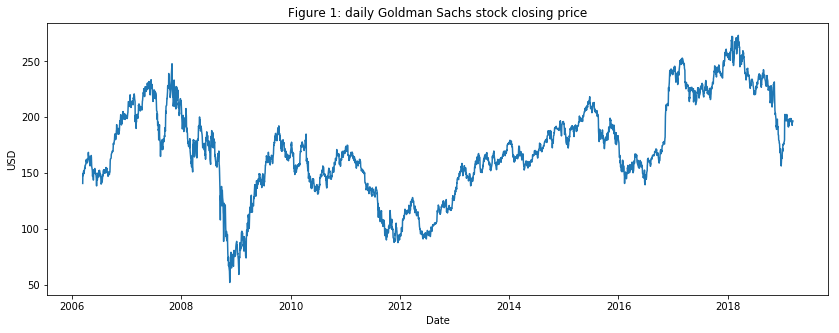

In [6]:
plt.figure(figsize=(14, 5))
plt.plot(df_GS['Date'], df_GS['Close'], label='Goldman Sachs stock')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Figure 1: daily Goldman Sachs stock closing price')

plt.show()

In [7]:
def log_returns(df):
    return_ = np.log(df['Close'])
    #print(return_)
    return return_.diff()

In [8]:
log_return_GS = log_returns(df_GS)

log_return_GS = log_return_GS.dropna()

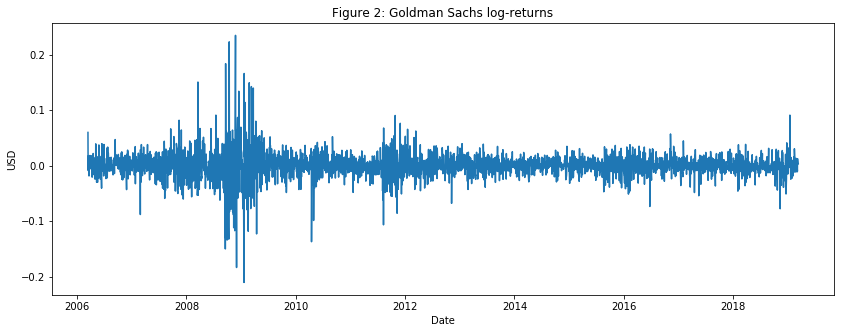

In [9]:
plt.figure(figsize=(14, 5))
plt.plot(df_GS['Date'][1:], log_return_GS, label='Goldman Sachs log-returns')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Figure 2: Goldman Sachs log-returns')

plt.show()

In [10]:
log_return_GS.describe()

count    3271.000000
mean        0.000102
std         0.023368
min        -0.210223
25%        -0.009651
50%         0.000244
75%         0.010259
max         0.234818
Name: Close, dtype: float64

In [11]:
from scipy import stats

stats.describe(log_return_GS)

DescribeResult(nobs=3271, minmax=(-0.2102226204826172, 0.2348177305482504), mean=0.00010227811313491936, variance=0.0005460577075846717, skewness=0.28113785126950197, kurtosis=15.963333797297988)

In [12]:
df_GS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3.272000e+03
mean,171.589077,173.569251,169.552705,171.568970,158.301522,6.873582e+06
std,42.404718,42.438831,42.325227,42.336044,43.233325,7.487466e+06
min,54.000000,54.540001,47.410000,52.000000,45.449589,6.942000e+05
25%,148.737499,150.439999,147.210007,148.707500,132.325997,2.929775e+06
50%,167.369995,168.965004,165.759995,167.385002,153.412308,4.454900e+06
75%,199.287499,201.779999,197.554996,199.430000,182.961086,7.820250e+06
max,274.339996,275.309998,270.769989,273.380005,269.334747,1.145907e+08


In [13]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(log_return_GS)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.505784
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [14]:
log_return_GS_sq = log_return_GS ** 2

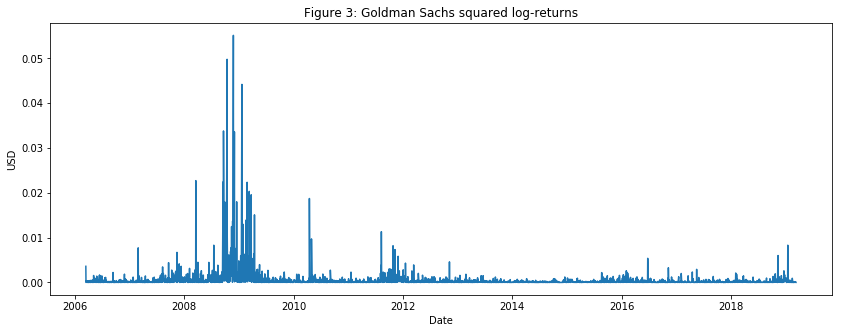

In [15]:
plt.figure(figsize=(14, 5))
plt.plot(df_GS['Date'][1:], log_return_GS_sq, label='Goldman Sachs squared log-returns')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Figure 3: Goldman Sachs squared log-returns')

plt.show()

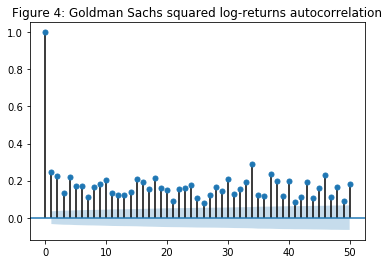

In [16]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(log_return_GS_sq, lags = 50)
plt.title('Figure 4: Goldman Sachs squared log-returns autocorrelation')
plt.show()

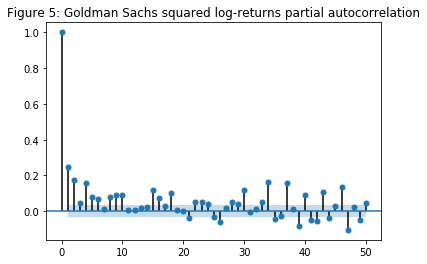

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(log_return_GS_sq, lags = 50)
plt.title('Figure 5: Goldman Sachs squared log-returns partial autocorrelation')
plt.show()

In [18]:
import statsmodels.stats.diagnostic as tsd

tsd.acorr_ljungbox(log_return_GS_sq, lags=50, boxpierce=True)

(array([ 201.05279543,  366.59148469,  424.21395216,  578.31764875,
         673.04312965,  769.82999832,  812.59267709,  902.18717488,
        1013.33835271, 1150.95312809, 1207.39285855, 1257.65701187,
        1306.73360418, 1368.0522165 , 1509.44429326, 1628.83474563,
        1709.79159574, 1859.36810567, 1942.84334639, 2015.69784474,
        2042.8354512 , 2121.63027731, 2207.28670285, 2308.99443709,
        2346.06469174, 2365.9532074 , 2413.30280535, 2501.1322003 ,
        2570.49029197, 2715.25914321, 2769.94581016, 2851.26446867,
        2971.61143842, 3250.15815313, 3298.1082038 , 3341.44689362,
        3525.01833144, 3655.33748768, 3699.50181969, 3826.67693072,
        3851.5177104 , 3893.12149788, 4015.02438337, 4053.92600116,
        4138.01417473, 4315.60671886, 4355.32757387, 4445.88984684,
        4471.53547029, 4578.20681559]),
 array([1.23052747e-045, 2.48696998e-080, 1.25852955e-091, 7.63051699e-124,
        3.30642649e-143, 5.07570181e-163, 3.55588021e-171, 1.9058307

In [19]:
from statsmodels.tsa.arima_model import ARIMA

series = log_return_GS
model = ARIMA(series, order=(2, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 3270
Model:                 ARIMA(2, 1, 0)   Log Likelihood                7150.195
Method:                       css-mle   S.D. of innovations              0.027
Date:                Sat, 06 Apr 2019   AIC                         -14292.390
Time:                        11:18:28   BIC                         -14268.020
Sample:                             1   HQIC                        -14283.663
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.692e-06      0.000     -0.029      0.977      -0.000       0.000
ar.L1.D.Close    -0.6877      0.016    -41.969      0.000      -0.720      -0.656
ar.L2.D.Close    -0.3508      0.016    -

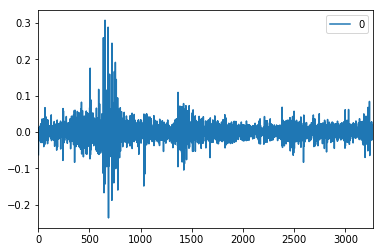

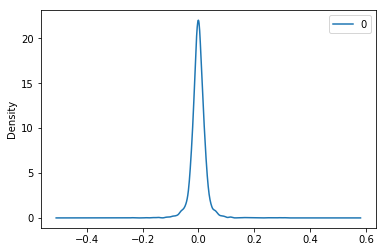

                 0
count  3270.000000
mean     -0.000017
std       0.027183
min      -0.236738
25%      -0.012400
50%      -0.000149
75%       0.011967
max       0.307250


In [20]:
# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

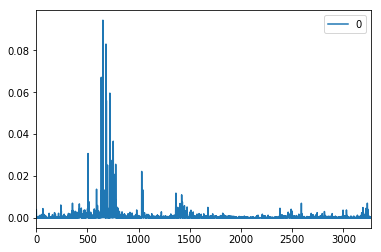

In [21]:
res_sq = residuals ** 2
res_sq.plot()

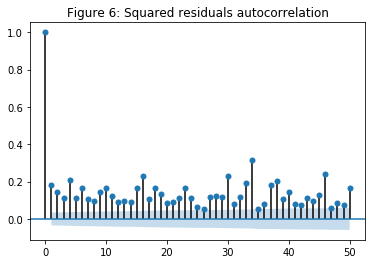

In [22]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residuals ** 2, lags = 50)
plt.title('Figure 6: Squared residuals autocorrelation')
plt.show()

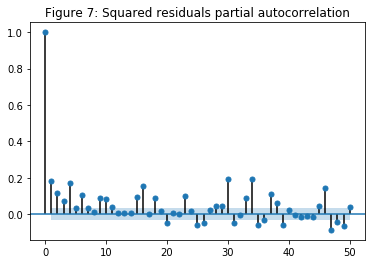

In [23]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(residuals ** 2, lags = 50)
plt.title('Figure 7: Squared residuals partial autocorrelation')
plt.show()

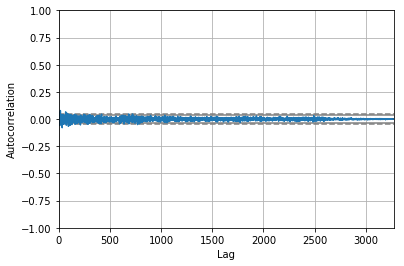

<Figure size 800x560 with 0 Axes>

In [24]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)
plt.figure(figsize=(10, 7), dpi=80)
plt.show() 

In [25]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

 15%|█▌        | 168/1113 [00:31<02:53,  5.45it/s]/usr/local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 56%|█████▋    | 628/1113 [02:23<01:56,  4.15it/s]/usr/local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 61%|██████    | 678/1113 [02:36<02:06,  3.43it/s]/usr/local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 87%|████████▋ | 965/1113 [03:46<00:35,  4.21it/s]/usr/local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Converge

In [26]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 0.000


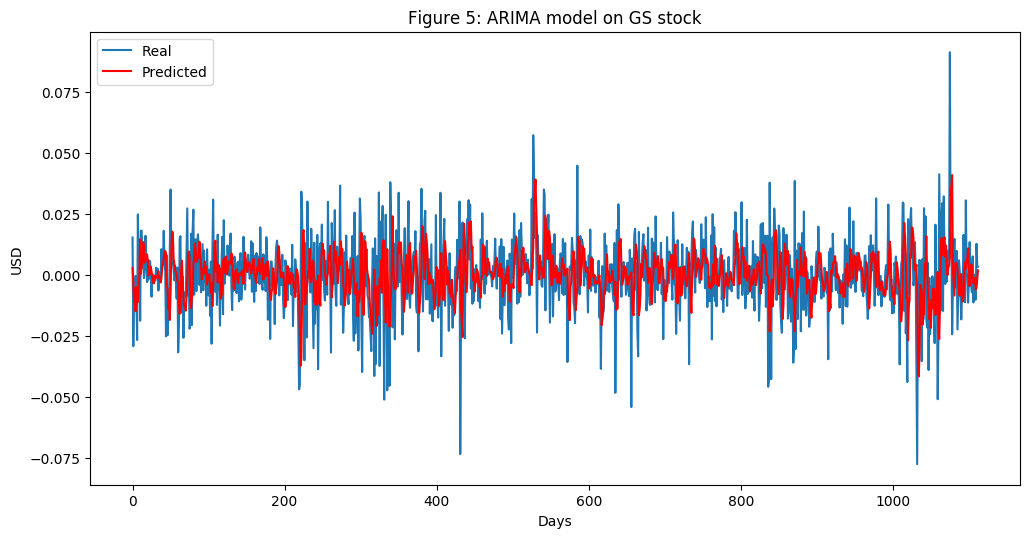

In [27]:
# Plot the predicted (from ARIMA) and real prices

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, label='Real')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 5: ARIMA model on GS stock')
plt.legend()
plt.show()

In [28]:
from statsmodels.tsa.arima_model import ARIMA

series = df_GS.Close
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 3271
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8590.292
Method:                       css-mle   S.D. of innovations              3.344
Date:                Sat, 06 Apr 2019   AIC                          17194.585
Time:                        11:36:19   BIC                          17237.235
Sample:                             1   HQIC                         17209.859
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0168      0.053      0.317      0.751      -0.087       0.121
ar.L1.D.Close    -0.0418      0.017     -2.393      0.017      -0.076      -0.008
ar.L2.D.Close    -0.0090      0.017     

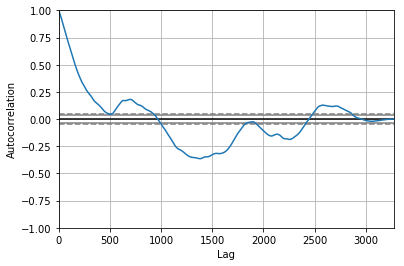

<Figure size 800x560 with 0 Axes>

In [29]:
autocorrelation_plot(series)
plt.figure(figsize=(10, 7), dpi=80)
plt.show() 

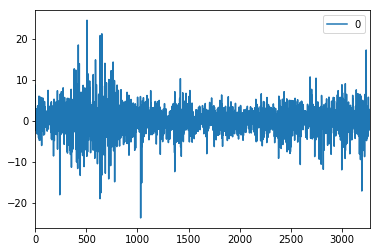

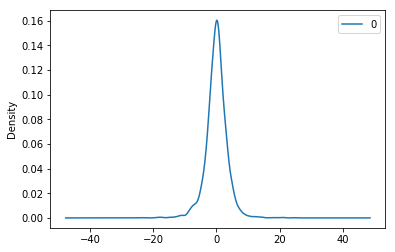

                 0
count  3271.000000
mean      0.000311
std       3.344826
min     -23.627098
25%      -1.651009
50%       0.053264
75%       1.710249
max      24.494212


In [30]:
# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

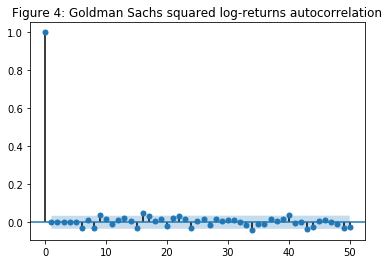

In [31]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residuals, lags = 50)
plt.title('Figure 4: Goldman Sachs squared log-returns autocorrelation')
plt.show()

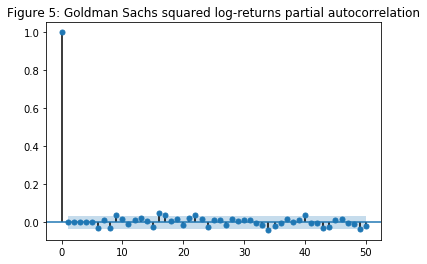

In [32]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(residuals, lags = 50)
plt.title('Figure 5: Goldman Sachs squared log-returns partial autocorrelation')
plt.show()

In [33]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

100%|██████████| 1113/1113 [04:24<00:00,  3.85it/s]


In [34]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 9.184


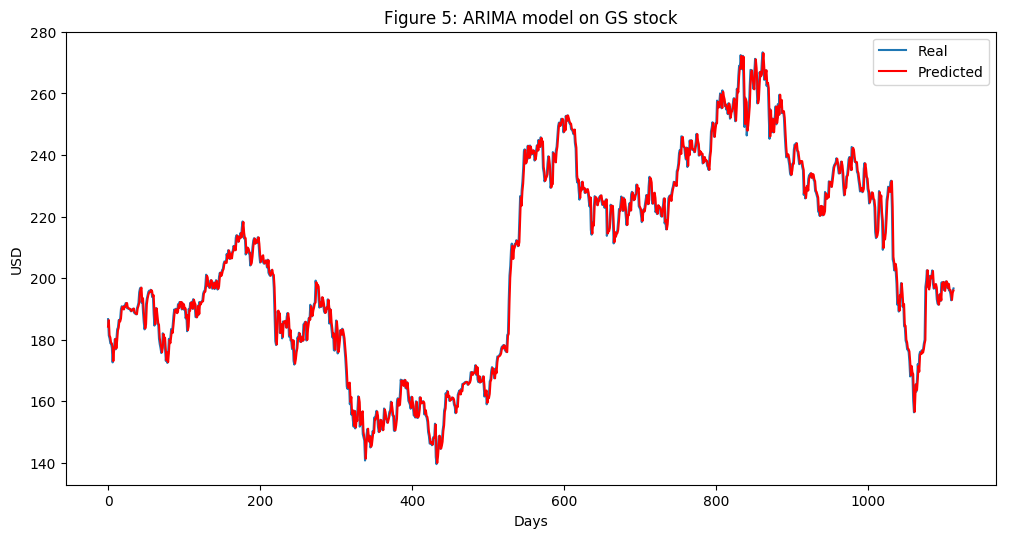

In [35]:
# Plot the predicted (from ARIMA) and real prices

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, label='Real')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 5: ARIMA model on GS stock')
plt.legend()
plt.show()

In [36]:
import warnings
import numpy
warnings.filterwarnings("always")

from arch import arch_model

#series = log_return_GS
series = df_GS.Close
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

# define model
model = arch_model(train, mean='ARX', vol='GARCH',  p=1, q=2)
# fit model
model_fit = model.fit()

print(model_fit.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 9735.82458415655
Iteration:      2,   Func. Count:     15,   Neg. LLF: 9650.711669217417
Iteration:      3,   Func. Count:     24,   Neg. LLF: 9590.05974361677
Iteration:      4,   Func. Count:     32,   Neg. LLF: 9501.626978254277
Iteration:      5,   Func. Count:     39,   Neg. LLF: 9411.120674930222
Iteration:      6,   Func. Count:     51,   Neg. LLF: 9397.874145591864
Iteration:      7,   Func. Count:     59,   Neg. LLF: 9312.433471995595
Iteration:      8,   Func. Count:     67,   Neg. LLF: 9299.838336580317
Iteration:      9,   Func. Count:     74,   Neg. LLF: 9284.828799563407
Iteration:     10,   Func. Count:     81,   Neg. LLF: 9264.069841186756
Iteration:     11,   Func. Count:     89,   Neg. LLF: 9252.76809152789
Iteration:     12,   Func. Count:     96,   Neg. LLF: 9251.44229954928
Iteration:     13,   Func. Count:    103,   Neg. LLF: 9251.052511886337
Iteration:     14,   Func. Count:    110,   Neg. LLF: 9249.912663171

In [ ]:
n_test = test.size
yhat = model_fit.forecast(horizon=n_test, method = 'simulation')

# plot forecast variance
plt.plot(yhat.simulation.values[-1, :])
plt.show()

In [37]:
import math

data_FT = df_GS[['Date', 'Close']]

close_fft = np.fft.fft(np.asarray(data_FT['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

/usr/local/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


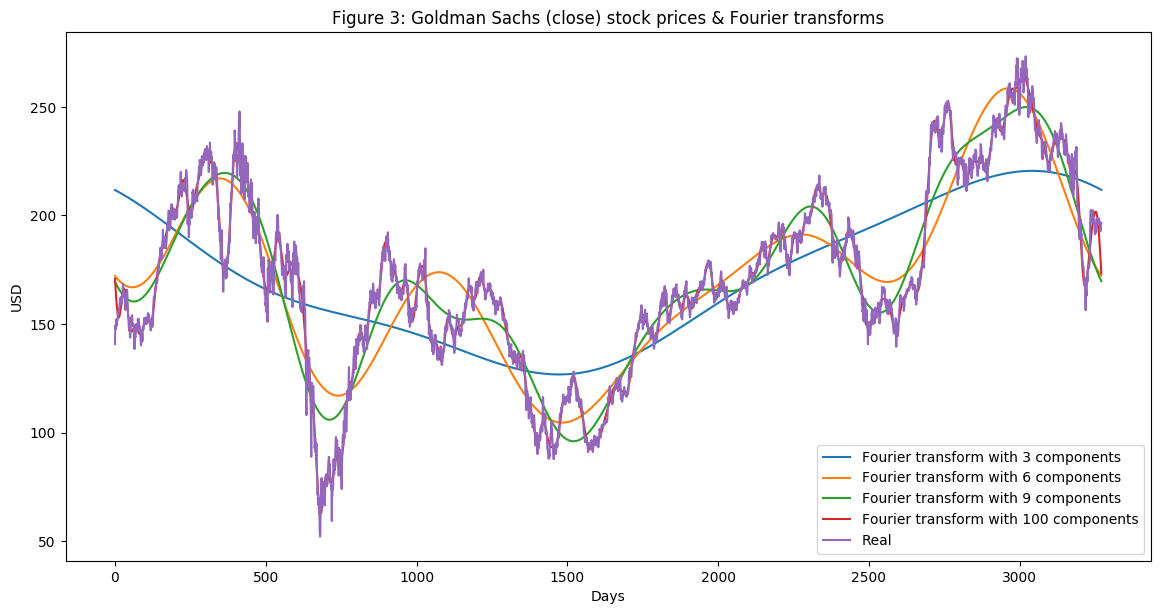

In [38]:
plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data_FT['Close'],  label='Real')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 3: Goldman Sachs (close) stock prices & Fourier transforms')
plt.legend()
plt.show()